# Bootstrap

In [40]:
import numpy as np
import pandas as pd
import scipy
from scipy import integrate
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import random
from tqdm import tqdm

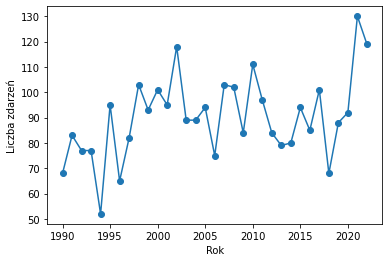

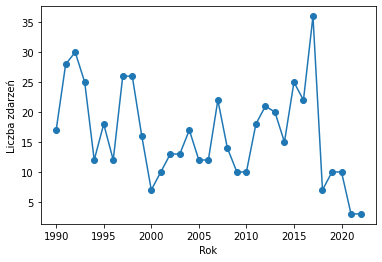

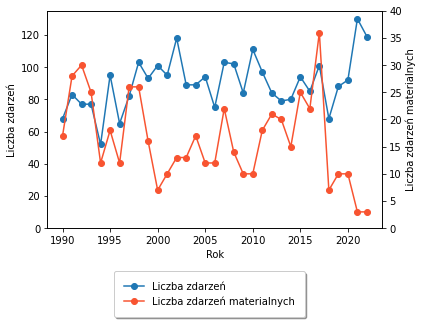

C:\Users\ndzad\AppData\Local\Temp/ipykernel_15648/3110197025.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


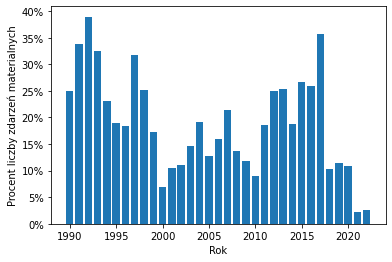

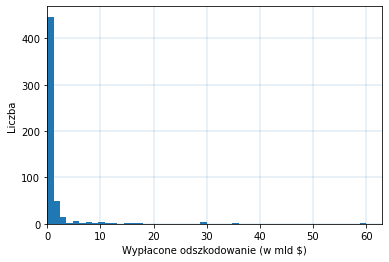

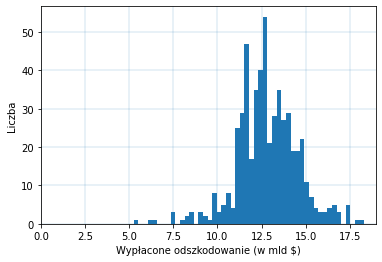

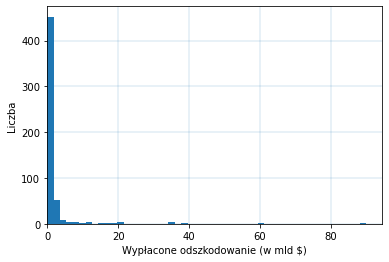

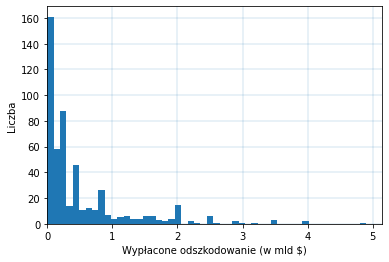

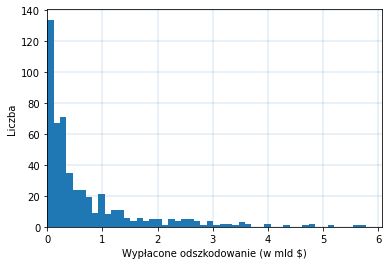

In [37]:
%run "C:\Users\ndzad\Dropbox\MINI\Magisterka\repo\mgr\DataPreparation.ipynb"
%run "C:\Users\ndzad\Dropbox\MINI\Magisterka\repo\mgr\Modelowanie_liczby_roszczen.ipynb"

In [32]:
T = pd.DataFrame({'t':[1990 + t/365 for t in range((datetime.datetime(1990,12,31)-datetime.datetime(1990,1,1)).days+1)]})
for r in range(1991,2023):
    if r%4==0:
        T = pd.concat([T,pd.DataFrame({'t':[r + t/366 for t in range((datetime.datetime(r,12,31)-datetime.datetime(r,1,1)).days+1)]})])
    else:
        T = pd.concat([T,pd.DataFrame({'t':[r + t/365 for t in range((datetime.datetime(r,12,31)-datetime.datetime(r,1,1)).days+1)]})])
T.reset_index(drop=True,inplace=True)

In [33]:
N = pd.merge(T, data_wo[['t','Ind']], on='t', how='left').fillna(0).groupby('t').sum().cumsum().assign(Year=np.floor(pd.merge(T, data_wo[['t','Ind']], on='t', how='left')['t']))
N = N.assign(Year=np.floor(N.index))
n = N.groupby('Year').max('Ind').diff().fillna(float(N.groupby('Year').max('Ind').head(1)['Ind'])).rename(columns = {'Ind':'n'})

T_train = T[T['t']<2013]
t_train = T_train['t'] - 1990
n_train = n[n.index<=2012]
N_train = N[N['Year']<=2012]

T_test = T[T['t']>=2013]
t_test = T_test['t'] - 2013
n_test = n[n.index>2012]
N_test = N[N['Year']>2012]

## Bootstrap

### Klasyczny bootstrap

In [25]:
number_of_simulations = 500

In [ ]:
def bootstrap(data, S ,B):
    """
    Argumenty:
        data: pd.Series
            Ciąg z którego próbkujemy
        S: fun
            Statystka
        B: float
            Liczba próbek bootstrapowych
    Zwraca:
        bootstrap_data: pd.Series
            Próba bootstrapowa          
    """    
    X = []
    for i in range(B):
        X.append(S(pd.Series(data).sample(len(data),replace=True)))
    if B == len(data):
        index_temp = data.index
    else:
        index_temp = range(B)

    bootstrap_data = pd.Series(X, name=data.name)
    
    return(bootstrap_data)

In [26]:
exp_lambda_bootstrap = []
ln_mu_bootstrap = []
ln_sigma_sq_bootstrap = []
gamma_alfa_bootstrap = []
gamma_beta_bootstrap = []
weibull_k_bootstrap = []
weibull_lambda_bootstrap = []
burr_c_bootstrap = []
burr_k_bootstrap = []

for i in range(number_of_simulations):
    damages = bootstrap(train["Insured Damages, Adjusted (\'000 US$)"], np.mean, len(train["Insured Damages, Adjusted (\'000 US$)"]))

    exp_lambda_bootstrap.append(len(damages)/sum(damages))
    ln_mu_bootstrap.append(sum(np.log(damages))/len(damages))
    ln_sigma_sq_bootstrap.append(sum(np.square(np.log(damages)-sum(np.log(damages))/len(damages)))/len(damages))
    gamma_alfa_bootstrap.append(stats.gamma.fit(damages,floc=0)[0])
    gamma_beta_bootstrap.append(1/stats.gamma.fit(damages,floc=0)[2])
    weibull_k_bootstrap.append(stats.weibull_min.fit(damages,floc=0)[0])
    weibull_lambda_bootstrap.append(stats.weibull_min.fit(damages,floc=0)[2])
    burr_c_bootstrap.append(stats.burr12.fit(damages,floc=0,fscale=1)[0])
    burr_k_bootstrap.append(stats.burr12.fit(damages,floc=0,fscale=1)[1])

c:\Users\ndzad\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [27]:
exp_lambda_bootstrap_avg = np.mean(exp_lambda_bootstrap)
exp_lambda_bootstrap_5p = np.percentile(exp_lambda_bootstrap,95)
exp_lambda_bootstrap_95p = np.percentile(exp_lambda_bootstrap,95)

ln_mu_bootstrap_avg = np.mean(ln_mu_bootstrap)
ln_mu_bootstrap_5p = np.percentile(ln_mu_bootstrap,95)
ln_mu_bootstrap_95p = np.percentile(ln_mu_bootstrap,95)

ln_sigma_sq_bootstrap_avg = np.mean(ln_sigma_sq_bootstrap)
ln_sigma_sq_bootstrap_5p = np.percentile(ln_sigma_sq_bootstrap,95)
ln_sigma_sq_bootstrap_95p = np.percentile(ln_sigma_sq_bootstrap,95)

gamma_alfa_bootstrap_avg = np.mean(gamma_alfa_bootstrap)
gamma_alfa_bootstrap_5p = np.percentile(gamma_alfa_bootstrap,95)
gamma_alfa_bootstrap_95p = np.percentile(gamma_alfa_bootstrap,95)

gamma_beta_bootstrap_avg = np.mean(gamma_beta_bootstrap)
gamma_beta_bootstrap_5p = np.percentile(gamma_beta_bootstrap,95)
gamma_beta_bootstrap_95p = np.percentile(gamma_beta_bootstrap,95)

weibull_k_bootstrap_avg = np.mean(weibull_k_bootstrap)
weibull_k_bootstrap_5p = np.percentile(weibull_k_bootstrap,95)
weibull_k_bootstrap_95p = np.percentile(weibull_k_bootstrap,95)

weibull_lambda_bootstrap_avg = np.mean(weibull_lambda_bootstrap)
weibull_lambda_bootstrap_5p = np.percentile(weibull_lambda_bootstrap,95)
weibull_lambda_bootstrap_95p = np.percentile(weibull_lambda_bootstrap,95)

burr_c_bootstrap_avg = np.mean(burr_c_bootstrap)
burr_c_bootstrap_5p = np.percentile(burr_c_bootstrap,95)
burr_c_bootstrap_95p = np.percentile(burr_c_bootstrap,95)

burr_k_bootstrap_avg = np.mean(burr_k_bootstrap)
burr_k_bootstrap_5p = np.percentile(burr_k_bootstrap,95)
burr_k_bootstrap_95p = np.percentile(burr_k_bootstrap,95)

In [124]:
print(pd.DataFrame
({
    'rozkład':['Wykładniczy','Lognormalny','Lognormalny','Gamma','Gamma','Weibulla','Weibulla','Burra','Burra'],
    'Parametr' : ['lambda',"mu","sigma_sq","alfa","beta","k","lambda","c","k"],
    'Wartość' : [
                    "{:e}".format(exp_lambda_bootstrap_avg),
                    round(ln_mu_bootstrap_avg,2),
                    round(ln_sigma_sq_bootstrap_avg,2),
                    round(gamma_alfa_bootstrap_avg,2),
                    "{:e}".format(gamma_beta_bootstrap_avg),
                    round(weibull_k_bootstrap_avg,2),
                    round(weibull_lambda_bootstrap_avg,2),
                    round(burr_c_bootstrap_avg,2),
                    round(burr_k_bootstrap_avg,2),
        ]
}))

       rozkład  Parametr       Wartość
0  Wykładniczy    lambda  1.667164e-06
1  Lognormalny        mu          13.3
2  Lognormalny  sigma_sq          0.01
3        Gamma      alfa        182.58
4        Gamma      beta  3.043956e-04
5     Weibulla         k         13.83
6     Weibulla    lambda      620643.0
7        Burra         c          1.49
8        Burra         k          0.05


In [38]:
sin_params = scipy.optimize.curve_fit(cum_sin_int_fun, xdata = t_train, ydata = N_train["Ind"], method = 'lm')[0]
power_law_params = scipy.optimize.curve_fit(cum_power_law_int_fun, xdata = t_train, ydata = N_train["Ind"], method = 'lm')[0]

In [44]:
loss_full = pd.merge(T, data_wo[['t','Insured Damages, Adjusted (\'000 US$)']], on='t', how='left').fillna(0).groupby('t').sum().rename(columns={'Insured Damages, Adjusted (\'000 US$)':'damages'})
cum_loss_full = loss_full.cumsum()

In [45]:
loss_train = pd.merge(T_train, train[['t','Insured Damages, Adjusted (\'000 US$)']], on='t', how='left').fillna(0).groupby('t').sum().rename(columns={'Insured Damages, Adjusted (\'000 US$)':'damages'})
cum_loss_train = loss_train.cumsum()

In [46]:
loss_test = pd.merge(T_test, test[['t','Insured Damages, Adjusted (\'000 US$)']], on='t', how='left').fillna(0).groupby('t').sum().rename(columns={'Insured Damages, Adjusted (\'000 US$)':'damages'})
cum_loss_test = loss_test.cumsum()

In [47]:
def loss_pred(t, n, damages, t_index):
    """
    Funkcja generuje proces dla zaobserwowanych zdarzeń.

    Argumenty:
        t: array
            Przestrzeń czasów
        n: array
            Zaobserowane czasy zdarzenia
        damages: array
            Straty
        t_index: array
            Pożądane indeksy
    Zwraca:
        pandas.Series
            Tablica czasów.
    """
    df = pd.DataFrame({'t':n, 'damages':damages}).set_index('t')
    counts = [sum([1 for x in n if x <= y]) for y in t]
    values = [sum([df['damages'][x] for x in n if x <= y]) for y in t]
    return(pd.DataFrame({'n' : counts, 'damages': values}, index = t_index))

## Straty - avg

### Rozkład wykładniczy

Sinusoidalna funkcja intensywności

In [48]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(sin_int_fun,sin_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.expon.rvs(scale=1/exp_lambda_bootstrap_avg,loc=0,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_sin_exp_bootstrap_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_sin_exp_bootstrap_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_sin_exp_bootstrap_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_sin_exp_bootstrap = np.sum(MSE_array)/number_of_simulations
MAE_sin_exp_bootstrap = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [1:12:44<00:00,  8.73s/it]


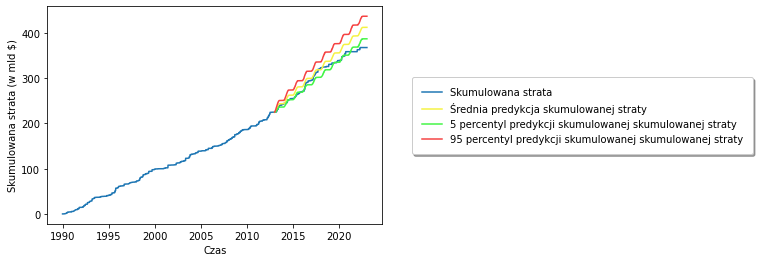

In [111]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_sin_exp_bootstrap_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_sin_exp_bootstrap_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_sin_exp_bootstrap_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootstrap\\cum_loss_exp_sin_bootstrap_avg.pdf",bbox_inches='tight')
plt.show()

Funkcja intensywności Power Law

In [50]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(power_law_int_fun,power_law_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.expon.rvs(scale=1/exp_lambda_bootstrap_avg,loc=0,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_power_law_exp_bootstrap_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_exp_bootstrap_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_exp_bootstrap_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_power_law_exp_bootstrap = np.sum(MSE_array)/number_of_simulations
MAE_power_law_exp_bootstrap = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [37:21<00:00,  4.48s/it] 


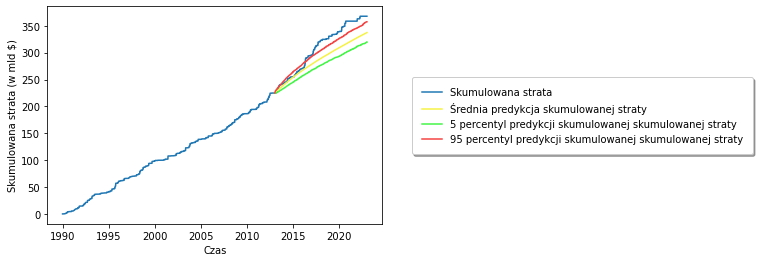

In [112]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_power_law_exp_bootstrap_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_power_law_exp_bootstrap_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_power_law_exp_bootstrap_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootstrap\\cum_loss_exp_power_law_bootstrap_avg.pdf",bbox_inches='tight')
plt.show()

### Rozkład lognormalny

Sinusoidalna funkcja intensywności

In [52]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(sin_int_fun,sin_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.lognorm.rvs(s=np.sqrt(ln_sigma_sq_bootstrap_avg),scale=np.exp(ln_mu_bootstrap_avg),size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_sin_ln_bootstrap_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_sin_ln_bootstrap_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_sin_ln_bootstrap_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_sin_ln_bootstrap = np.sum(MSE_array)/number_of_simulations
MAE_sin_ln_bootstrap = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [55:57<00:00,  6.71s/it]


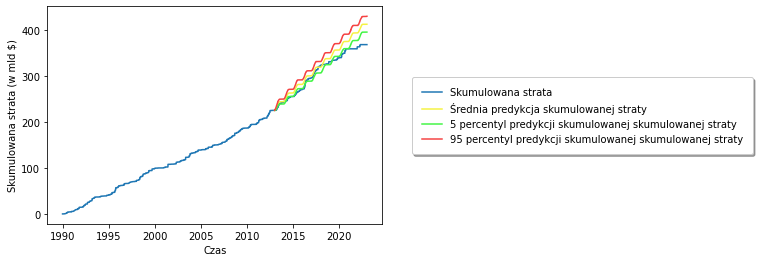

In [113]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_sin_ln_bootstrap_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_sin_ln_bootstrap_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_sin_ln_bootstrap_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootstrap\\cum_loss_ln_sin_bootstrap_avg.pdf",bbox_inches='tight')
plt.show()

Funkcja intensywności Power Law

In [54]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(power_law_int_fun,power_law_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.lognorm.rvs(s=np.sqrt(ln_sigma_sq_bootstrap_avg),scale=np.exp(ln_mu_bootstrap_avg),size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_power_law_ln_bootstrap_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_ln_bootstrap_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_ln_bootstrap_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_power_law_ln_bootstrap = np.sum(MSE_array)/number_of_simulations
MAE_power_law_ln_bootstrap = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [36:10<00:00,  4.34s/it]


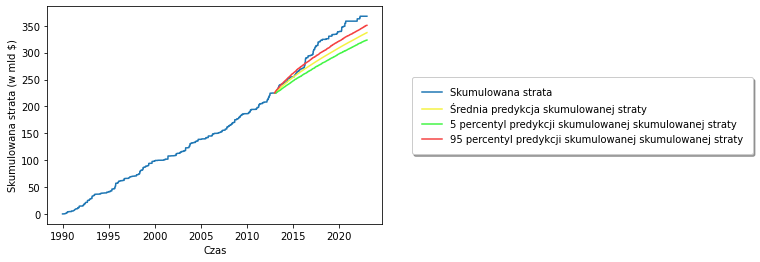

In [114]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_power_law_ln_bootstrap_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_power_law_ln_bootstrap_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_power_law_ln_bootstrap_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootstrap\\cum_loss_ln_power_law_bootstrap_avg.pdf",bbox_inches='tight')
plt.show()

### Rozkład gamma

Sinusoidalna funkcja intensywności

In [56]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(sin_int_fun,sin_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.gamma.rvs(a=gamma_alfa_bootstrap_avg,scale=1/gamma_beta_bootstrap_avg,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_sin_gamma_bootstrap_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_sin_gamma_bootstrap_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_sin_gamma_bootstrap_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_sin_gamma_bootstrap = np.sum(MSE_array)/number_of_simulations
MAE_sin_gamma_bootstrap = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [1:00:13<00:00,  7.23s/it]


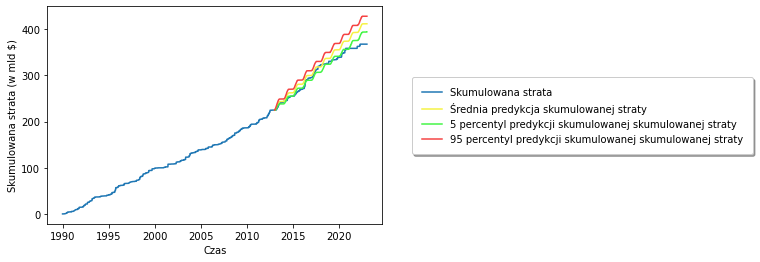

In [115]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_sin_gamma_bootstrap_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_sin_gamma_bootstrap_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_sin_gamma_bootstrap_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootstrap\\cum_loss_gamma_sin_bootstrap_avg.pdf",bbox_inches='tight')
plt.show()

Funkcja intensywności Power Law

In [58]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(power_law_int_fun,power_law_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.gamma.rvs(a=gamma_alfa_bootstrap_avg,scale=1/gamma_beta_bootstrap_avg,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_power_law_gamma_bootstrap_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_gamma_bootstrap_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_gamma_bootstrap_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_power_law_gamma_bootstrap = np.sum(MSE_array)/number_of_simulations
MAE_power_law_gamma_bootstrap = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [36:14<00:00,  4.35s/it]


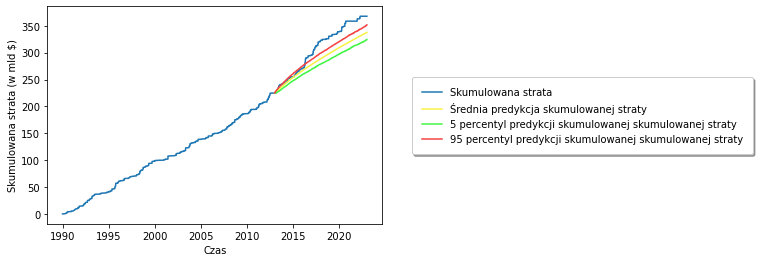

In [116]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_power_law_gamma_bootstrap_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_power_law_gamma_bootstrap_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_power_law_gamma_bootstrap_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootstrap\\cum_loss_gamma_power_law_bootstrap_avg.pdf",bbox_inches='tight')
plt.show()

### Rozkład Weibulla

Sinusoidalna funkcja intensywności

In [60]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(sin_int_fun,sin_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.weibull_min.rvs(c=weibull_k_bootstrap_avg,scale=weibull_lambda_bootstrap_avg,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_sin_weibull_bootstrap_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_sin_weibull_bootstrap_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_sin_weibull_bootstrap_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_sin_weibull_bootstrap = np.sum(MSE_array)/number_of_simulations
MAE_sin_weibull_bootstrap = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [58:12<00:00,  6.98s/it] 


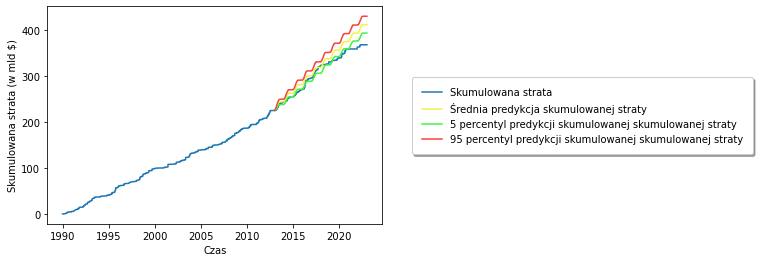

In [117]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_sin_weibull_bootstrap_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_sin_weibull_bootstrap_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_sin_weibull_bootstrap_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootstrap\\cum_loss_weibull_sin_bootstrap_avg.pdf",bbox_inches='tight')
plt.show()

Funkcja intensywności Power Law

In [62]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(power_law_int_fun,power_law_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.weibull_min.rvs(c=weibull_k_bootstrap_avg,scale=weibull_lambda_bootstrap_avg,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_power_law_weibull_bootstrap_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_weibull_bootstrap_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_weibull_bootstrap_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_power_law_weibull_bootstrap = np.sum(MSE_array)/number_of_simulations
MAE_power_law_weibull_bootstrap = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [36:48<00:00,  4.42s/it]


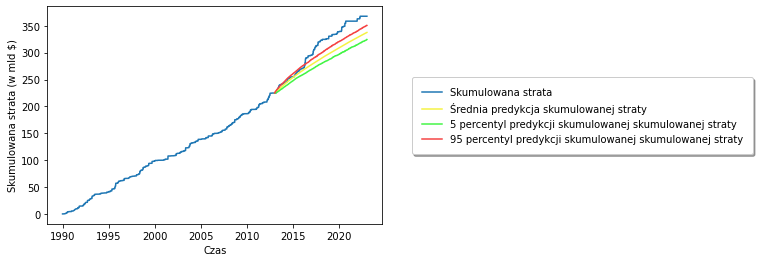

In [118]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_power_law_weibull_bootstrap_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_power_law_weibull_bootstrap_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_power_law_weibull_bootstrap_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootstrap\\cum_loss_weibull_power_law_bootstrap_avg.pdf",bbox_inches='tight')
plt.show()

### Rozkład Burra

Sinusoidalna funkcja intensywności

In [64]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(sin_int_fun,sin_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.burr12.rvs(c=burr_c_bootstrap_avg,d=burr_k_bootstrap_avg,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_sin_burr_bootstrap_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_sin_burr_bootstrap_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_sin_burr_bootstrap_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_sin_burr_bootstrap = np.sum(MSE_array)/number_of_simulations
MAE_sin_burr_bootstrap = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [57:54<00:00,  6.95s/it] 


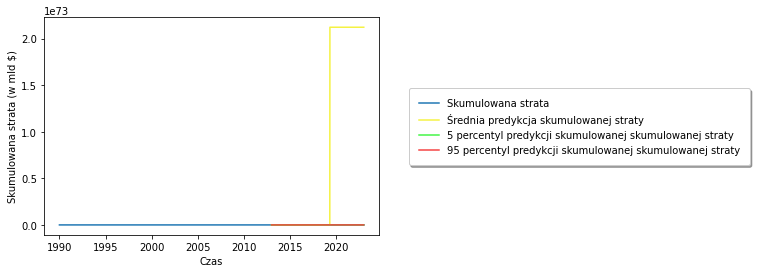

In [119]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_sin_burr_bootstrap_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_sin_burr_bootstrap_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_sin_burr_bootstrap_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootstrap\\cum_loss_burr_sin_bootstrap_avg.pdf",bbox_inches='tight')
plt.show()

Funkcja intensywności Power Law

In [66]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(power_law_int_fun,power_law_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.burr12.rvs(c=burr_c_bootstrap_avg,d=burr_k_bootstrap_avg,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_power_law_burr_bootstrap_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_burr_bootstrap_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_burr_bootstrap_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_power_law_burr_bootstrap = np.sum(MSE_array)/number_of_simulations
MAE_power_law_burr_bootstrap = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [31:44<00:00,  3.81s/it]


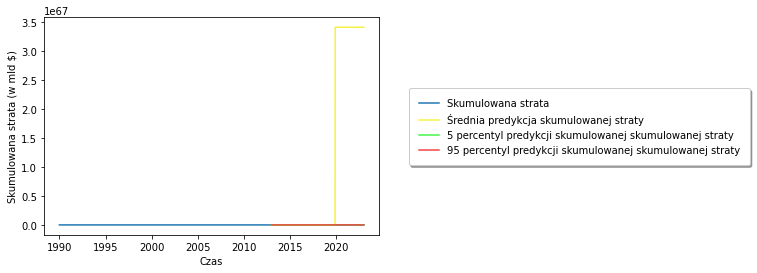

In [120]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_power_law_burr_bootstrap_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_power_law_burr_bootstrap_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_power_law_burr_bootstrap_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootstrap\\cum_loss_burr_power_law_bootstrap_avg.pdf",bbox_inches='tight')
plt.show()

### Wyniki

In [70]:
# Wyniki

print(pd.DataFrame
({
    'rozkład':['Wykładniczy','Wykładniczy', "Lognormalny", "Lognormalny", "Gamma", "Gamma", "Weibulla", "Weibulla", "Burra", "Burra"],
    'funkcja':['Sinusoidalna','Power Law','Sinusoidalna','Power Law','Sinusoidalna','Power Law','Sinusoidalna','Power Law','Sinusoidalna','Power Law'],
    'MSE':["{:e}".format(MSE_sin_exp_bootstrap),"{:e}".format(MSE_power_law_exp_bootstrap),"{:e}".format(MSE_sin_ln_bootstrap),"{:e}".format(MSE_power_law_ln_bootstrap),"{:e}".format(MSE_sin_gamma_bootstrap),"{:e}".format(MSE_power_law_gamma_bootstrap),"{:e}".format(MSE_sin_weibull_bootstrap),"{:e}".format(MSE_power_law_weibull_bootstrap),"{:e}".format(MSE_sin_burr_bootstrap),"{:e}".format(MSE_power_law_burr_bootstrap)],
    'MAE':["{:e}".format(MAE_sin_exp_bootstrap),"{:e}".format(MAE_power_law_exp_bootstrap),"{:e}".format(MAE_sin_ln_bootstrap),"{:e}".format(MAE_power_law_ln_bootstrap),"{:e}".format(MAE_sin_gamma_bootstrap),"{:e}".format(MAE_power_law_gamma_bootstrap),"{:e}".format(MAE_sin_weibull_bootstrap),"{:e}".format(MAE_power_law_weibull_bootstrap),"{:e}".format(MAE_sin_burr_bootstrap),"{:e}".format(MAE_power_law_burr_bootstrap)]                                            
}))

       rozkład       funkcja            MSE           MAE
0  Wykładniczy  Sinusoidalna   7.289588e+16  2.695694e+08
1  Wykładniczy     Power Law   3.794700e+16  1.944765e+08
2  Lognormalny  Sinusoidalna   7.252073e+16  2.690806e+08
3  Lognormalny     Power Law   3.785231e+16  1.943674e+08
4        Gamma  Sinusoidalna   7.249332e+16  2.690329e+08
5        Gamma     Power Law   3.801572e+16  1.948049e+08
6     Weibulla  Sinusoidalna   7.240147e+16  2.688546e+08
7     Weibulla     Power Law   3.798024e+16  1.947221e+08
8        Burra  Sinusoidalna  2.249797e+161  2.121225e+79
9        Burra     Power Law  5.803316e+149  3.406851e+73


In [72]:
print(pd.DataFrame
({
    'rozkład':['Wykładniczy','Wykładniczy', "Lognormalny", "Lognormalny", "Gamma", "Gamma", "Weibulla", "Weibulla", "Burra", "Burra"],
    'funkcja':['Sinusoidalna','Power Law','Sinusoidalna','Power Law','Sinusoidalna','Power Law','Sinusoidalna','Power Law','Sinusoidalna','Power Law'],
    'MSE':[MSE_sin_exp_bootstrap,MSE_power_law_exp_bootstrap,MSE_sin_ln_bootstrap,MSE_power_law_ln_bootstrap,MSE_sin_gamma_bootstrap,MSE_power_law_gamma_bootstrap,MSE_sin_weibull_bootstrap,MSE_power_law_weibull_bootstrap,MSE_sin_burr_bootstrap,MSE_power_law_burr_bootstrap],
    'MAE':[MAE_sin_exp_bootstrap,MAE_power_law_exp_bootstrap,MAE_sin_ln_bootstrap,MAE_power_law_ln_bootstrap,MAE_sin_gamma_bootstrap,MAE_power_law_gamma_bootstrap,MAE_sin_weibull_bootstrap,MAE_power_law_weibull_bootstrap,MAE_sin_burr_bootstrap,MAE_power_law_burr_bootstrap]                                            
}))

       rozkład       funkcja            MSE           MAE
0  Wykładniczy  Sinusoidalna   7.289588e+16  2.695694e+08
1  Wykładniczy     Power Law   3.794700e+16  1.944765e+08
2  Lognormalny  Sinusoidalna   7.252073e+16  2.690806e+08
3  Lognormalny     Power Law   3.785231e+16  1.943674e+08
4        Gamma  Sinusoidalna   7.249332e+16  2.690329e+08
5        Gamma     Power Law   3.801572e+16  1.948049e+08
6     Weibulla  Sinusoidalna   7.240147e+16  2.688546e+08
7     Weibulla     Power Law   3.798024e+16  1.947221e+08
8        Burra  Sinusoidalna  2.249797e+161  2.121225e+79
9        Burra     Power Law  5.803316e+149  3.406851e+73


Rozkład parametrów otrzymanych poprzez dopasowywanie do danych syntentycznych.

exp_lambda_bootstrap


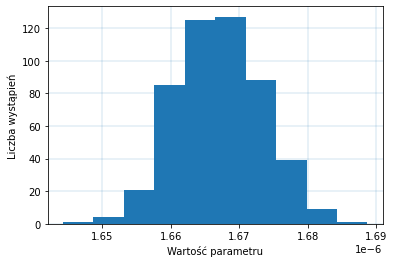

ln_mu_bootstrap


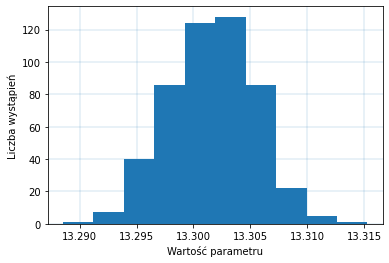

ln_sigma_sq_bootstrap


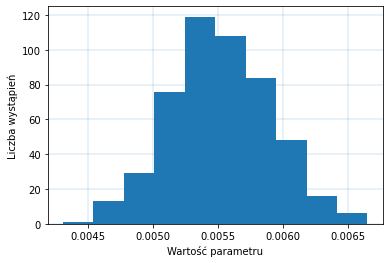

gamma_alfa_bootstrap


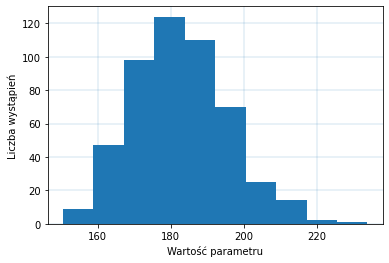

gamma_beta_bootstrap


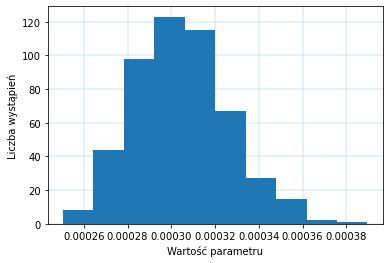

weibull_k_bootstrap


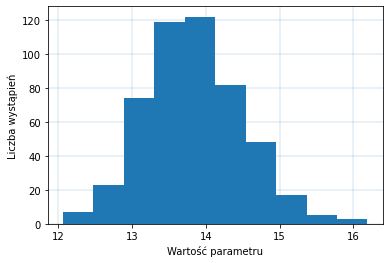

weibull_lambda_bootstrap


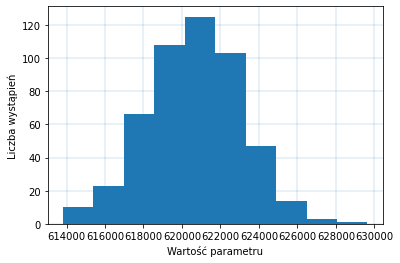

burr_c_bootstrap


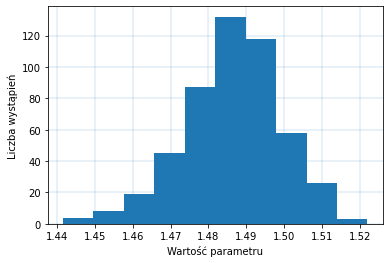

burr_k_bootstrap


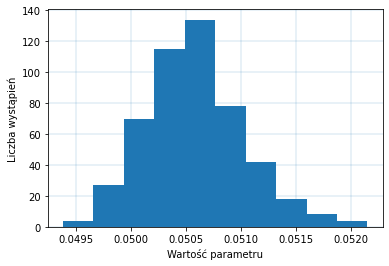

In [ ]:
names = ["exp_lambda_bootstrap" ,"ln_mu_bootstrap" ,"ln_sigma_sq_bootstrap" ,"gamma_alfa_bootstrap" ,"gamma_beta_bootstrap" ,"weibull_k_bootstrap" ,"weibull_lambda_bootstrap" ,"burr_c_bootstrap" ,"burr_k_bootstrap"]
j = 0

for i in [exp_lambda_bootstrap ,
ln_mu_bootstrap ,
ln_sigma_sq_bootstrap ,
gamma_alfa_bootstrap ,
gamma_beta_bootstrap ,
weibull_k_bootstrap ,
weibull_lambda_bootstrap ,
burr_c_bootstrap ,
burr_k_bootstrap]:
    plt.hist(i)
    plt.xlabel("Wartość parametru")
    plt.ylabel("Liczba wystąpień")
    plt.grid(color='C0', linestyle='-', linewidth=0.2)
    plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootstrap\\"+names[j]+"_distribution.pdf",bbox_inches='tight')
    print(names[j])
    j += 1
    plt.show()

## Bootknife

In [73]:
def bootknife(data, S, B):
    """
    Argumenty:
        data: pd.Series
            Ciąg start
        B: float
            Liczba próbek bootstrapowych
        S: fun
            Statystka
    Zwraca:
        bootknife_data: pd.Series
            Próba bootknife       
    """
    X= []
    for i in range(B):
        obs_to_delete = random.choice(pd.Series(data).index)
        data_r = data.drop(obs_to_delete)
        X.append(S(pd.Series(data_r).sample(len(data),replace=True)))
    if B == len(data):
            index_temp = data.index
    else:
        index_temp = range(B)

    bootknife_data = pd.Series(X, name=data.name)
    
    return(bootknife_data)

In [74]:
exp_lambda_bootknife = []
ln_mu_bootknife = []
ln_sigma_sq_bootknife = []
gamma_alfa_bootknife = []
gamma_beta_bootknife = []
weibull_k_bootknife = []
weibull_lambda_bootknife = []
burr_c_bootknife = []
burr_k_bootknife = []

for i in range(number_of_simulations):
    damages = bootknife(train["Insured Damages, Adjusted (\'000 US$)"], np.mean, len(train["Insured Damages, Adjusted (\'000 US$)"]))

    exp_lambda_bootknife.append(len(damages)/sum(damages))
    ln_mu_bootknife.append(sum(np.log(damages))/len(damages))
    ln_sigma_sq_bootknife.append(sum(np.square(np.log(damages)-sum(np.log(damages))/len(damages)))/len(damages))
    gamma_alfa_bootknife.append(stats.gamma.fit(damages,floc=0)[0])
    gamma_beta_bootknife.append(1/stats.gamma.fit(damages,floc=0)[2])
    weibull_k_bootknife.append(stats.weibull_min.fit(damages,floc=0)[0])
    weibull_lambda_bootknife.append(stats.weibull_min.fit(damages,floc=0)[2])
    burr_c_bootknife.append(stats.burr12.fit(damages,floc=0,fscale=1)[0])
    burr_k_bootknife.append(stats.burr12.fit(damages,floc=0,fscale=1)[1])

c:\Users\ndzad\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [75]:
exp_lambda_bootknife_avg = np.mean(exp_lambda_bootknife)
exp_lambda_bootknife_5p = np.percentile(exp_lambda_bootknife,95)
exp_lambda_bootknife_95p = np.percentile(exp_lambda_bootknife,95)

ln_mu_bootknife_avg = np.mean(ln_mu_bootknife)
ln_mu_bootknife_5p = np.percentile(ln_mu_bootknife,95)
ln_mu_bootknife_95p = np.percentile(ln_mu_bootknife,95)

ln_sigma_sq_bootknife_avg = np.mean(ln_sigma_sq_bootknife)
ln_sigma_sq_bootknife_5p = np.percentile(ln_sigma_sq_bootknife,95)
ln_sigma_sq_bootknife_95p = np.percentile(ln_sigma_sq_bootknife,95)

gamma_alfa_bootknife_avg = np.mean(gamma_alfa_bootknife)
gamma_alfa_bootknife_5p = np.percentile(gamma_alfa_bootknife,95)
gamma_alfa_bootknife_95p = np.percentile(gamma_alfa_bootknife,95)

gamma_beta_bootknife_avg = np.mean(gamma_beta_bootknife)
gamma_beta_bootknife_5p = np.percentile(gamma_beta_bootknife,95)
gamma_beta_bootknife_95p = np.percentile(gamma_beta_bootknife,95)

weibull_k_bootknife_avg = np.mean(weibull_k_bootknife)
weibull_k_bootknife_5p = np.percentile(weibull_k_bootknife,95)
weibull_k_bootknife_95p = np.percentile(weibull_k_bootknife,95)

weibull_lambda_bootknife_avg = np.mean(weibull_lambda_bootknife)
weibull_lambda_bootknife_5p = np.percentile(weibull_lambda_bootknife,95)
weibull_lambda_bootknife_95p = np.percentile(weibull_lambda_bootknife,95)

burr_c_bootknife_avg = np.mean(burr_c_bootknife)
burr_c_bootknife_5p = np.percentile(burr_c_bootknife,95)
burr_c_bootknife_95p = np.percentile(burr_c_bootknife,95)

burr_k_bootknife_avg = np.mean(burr_k_bootknife)
burr_k_bootknife_5p = np.percentile(burr_k_bootknife,95)
burr_k_bootknife_95p = np.percentile(burr_k_bootknife,95)

In [125]:
print(pd.DataFrame
({
    'rozkład':['Wykładniczy','Lognormalny','Lognormalny','Gamma','Gamma','Weibulla','Weibulla','Burra','Burra'],
    'Parametr' : ['lambda',"mu","sigma_sq","alfa","beta","k","lambda","c","k"],
    'Wartość' : [
                    "{:e}".format(exp_lambda_bootknife_avg),
                    round(ln_mu_bootknife_avg,2),
                    round(ln_sigma_sq_bootknife_avg,2),
                    round(gamma_alfa_bootknife_avg,2),
                    "{:e}".format(gamma_beta_bootknife_avg),
                    round(weibull_k_bootknife_avg,2),
                    round(weibull_lambda_bootknife_avg,2),
                    round(burr_c_bootknife_avg,2),
                    round(burr_k_bootknife_avg,2),
        ]
}))

       rozkład  Parametr       Wartość
0  Wykładniczy    lambda  1.668027e-06
1  Lognormalny        mu          13.3
2  Lognormalny  sigma_sq          0.01
3        Gamma      alfa        182.84
4        Gamma      beta  3.049769e-04
5     Weibulla         k          13.8
6     Weibulla    lambda      620345.4
7        Burra         c          1.49
8        Burra         k          0.05


## Straty - avg

### Rozkład wykładniczy

Sinusoidalna funkcja intensywności

In [77]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(sin_int_fun,sin_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.expon.rvs(scale=1/exp_lambda_bootknife_avg,loc=0,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_sin_exp_bootknife_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_sin_exp_bootknife_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_sin_exp_bootknife_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_sin_exp_bootknife = np.sum(MSE_array)/number_of_simulations
MAE_sin_exp_bootknife = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [1:41:34<00:00, 12.19s/it]  


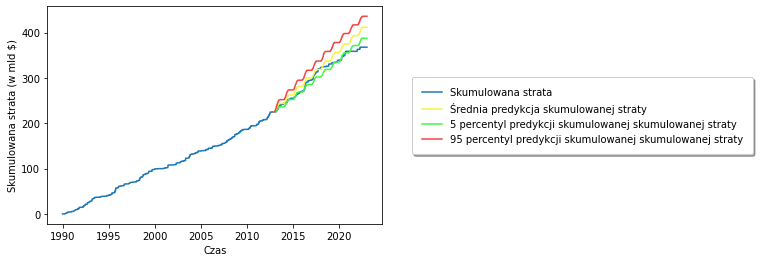

In [101]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_sin_exp_bootknife_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_sin_exp_bootknife_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_sin_exp_bootknife_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootknife\\cum_loss_exp_sin_bootknife_avg.pdf",bbox_inches='tight')
plt.show()

Funkcja intensywności Power Law

In [79]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(power_law_int_fun,power_law_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.expon.rvs(scale=1/exp_lambda_bootknife_avg,loc=0,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_power_law_exp_bootknife_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_exp_bootknife_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_exp_bootknife_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_power_law_exp_bootknife = np.sum(MSE_array)/number_of_simulations
MAE_power_law_exp_bootknife = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [38:16<00:00,  4.59s/it]


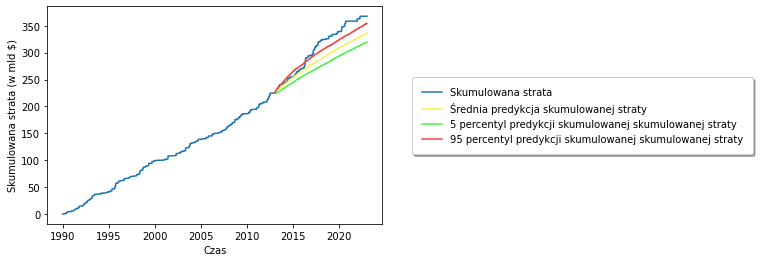

In [102]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_power_law_exp_bootknife_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_power_law_exp_bootknife_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_power_law_exp_bootknife_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootknife\\cum_loss_exp_power_law_bootknife_avg.pdf",bbox_inches='tight')
plt.show()

### Rozkład lognormalny

Sinusoidalna funkcja intensywności

In [81]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(sin_int_fun,sin_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.lognorm.rvs(s=np.sqrt(ln_sigma_sq_bootknife_avg),scale=np.exp(ln_mu_bootknife_avg),size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_sin_ln_bootknife_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_sin_ln_bootknife_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_sin_ln_bootknife_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_sin_ln_bootknife = np.sum(MSE_array)/number_of_simulations
MAE_sin_ln_bootknife = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [46:08<00:00,  5.54s/it]


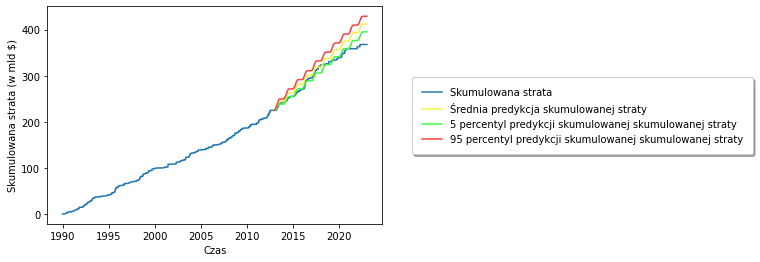

In [103]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_sin_ln_bootknife_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_sin_ln_bootknife_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_sin_ln_bootknife_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootknife\\cum_loss_ln_sin_bootknife_avg.pdf",bbox_inches='tight')
plt.show()

Funkcja intensywności Power Law

In [83]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(power_law_int_fun,power_law_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.lognorm.rvs(s=np.sqrt(ln_sigma_sq_bootknife_avg),scale=np.exp(ln_mu_bootknife_avg),size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_power_law_ln_bootknife_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_ln_bootknife_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_ln_bootknife_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_power_law_ln_bootknife = np.sum(MSE_array)/number_of_simulations
MAE_power_law_ln_bootknife = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [28:27<00:00,  3.42s/it]


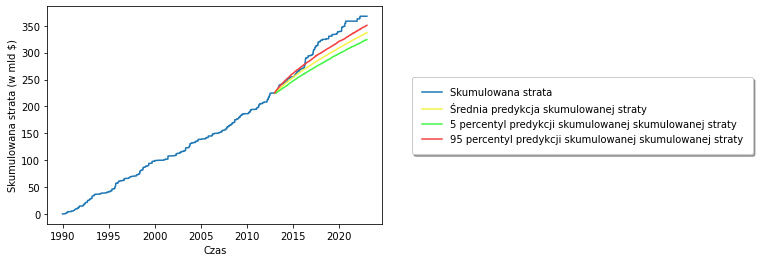

In [104]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_power_law_ln_bootknife_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_power_law_ln_bootknife_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_power_law_ln_bootknife_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootknife\\cum_loss_ln_power_law_bootknife_avg.pdf",bbox_inches='tight')
plt.show()

### Rozkład gamma

Sinusoidalna funkcja intensywności

In [85]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(sin_int_fun,sin_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.gamma.rvs(a=gamma_alfa_bootknife_avg,scale=1/gamma_beta_bootknife_avg,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_sin_gamma_bootknife_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_sin_gamma_bootknife_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_sin_gamma_bootknife_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_sin_gamma_bootknife = np.sum(MSE_array)/number_of_simulations
MAE_sin_gamma_bootknife = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [46:25<00:00,  5.57s/it]


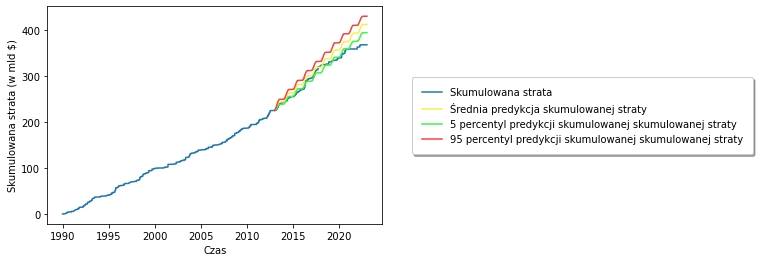

In [105]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_sin_gamma_bootknife_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_sin_gamma_bootknife_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_sin_gamma_bootknife_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootknife\\cum_loss_gamma_sin_bootknife_avg.pdf",bbox_inches='tight')
plt.show()

Funkcja intensywności Power Law

In [87]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(power_law_int_fun,power_law_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.gamma.rvs(a=gamma_alfa_bootknife_avg,scale=1/gamma_beta_bootknife_avg,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_power_law_gamma_bootknife_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_gamma_bootknife_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_gamma_bootknife_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_power_law_gamma_bootknife = np.sum(MSE_array)/number_of_simulations
MAE_power_law_gamma_bootknife = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [27:27<00:00,  3.29s/it]


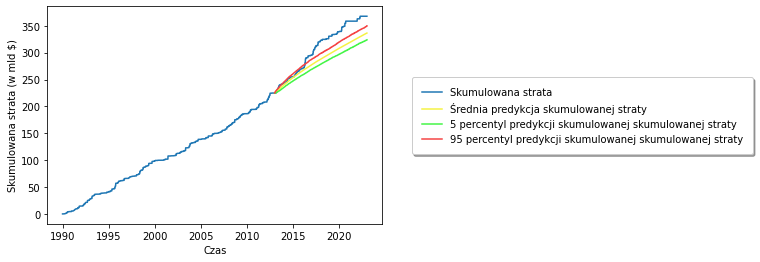

In [106]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_power_law_gamma_bootknife_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_power_law_gamma_bootknife_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_power_law_gamma_bootknife_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootknife\\cum_loss_gamma_power_law_bootknife_avg.pdf",bbox_inches='tight')
plt.show()

### Rozkład Weibulla

Sinusoidalna funkcja intensywności

In [89]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(sin_int_fun,sin_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.weibull_min.rvs(c=weibull_k_bootknife_avg,scale=weibull_lambda_bootknife_avg,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_sin_weibull_bootknife_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_sin_weibull_bootknife_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_sin_weibull_bootknife_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_sin_weibull_bootknife = np.sum(MSE_array)/number_of_simulations
MAE_sin_weibull_bootknife = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [45:01<00:00,  5.40s/it]  


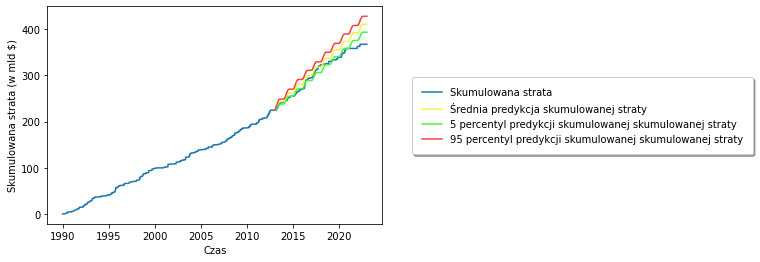

In [107]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_sin_weibull_bootknife_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_sin_weibull_bootknife_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_sin_weibull_bootknife_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootknife\\cum_loss_weibull_sin_bootknife_avg.pdf",bbox_inches='tight')
plt.show()

Funkcja intensywności Power Law

In [91]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(power_law_int_fun,power_law_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.weibull_min.rvs(c=weibull_k_bootknife_avg,scale=weibull_lambda_bootknife_avg,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_power_law_weibull_bootknife_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_weibull_bootknife_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_weibull_bootknife_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_power_law_weibull_bootknife = np.sum(MSE_array)/number_of_simulations
MAE_power_law_weibull_bootknife = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [28:29<00:00,  3.42s/it]


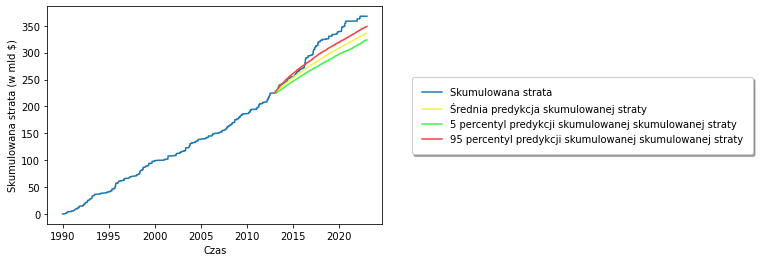

In [108]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_power_law_weibull_bootknife_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_power_law_weibull_bootknife_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_power_law_weibull_bootknife_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootknife\\cum_loss_weibull_power_law_bootknife_avg.pdf",bbox_inches='tight')
plt.show()

### Rozkład Burra

Sinusoidalna funkcja intensywności

In [93]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(sin_int_fun,sin_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.burr12.rvs(c=burr_c_bootknife_avg,d=burr_k_bootknife_avg,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_sin_burr_bootknife_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_sin_burr_bootknife_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_sin_burr_bootknife_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_sin_burr_bootknife = np.sum(MSE_array)/number_of_simulations
MAE_sin_burr_bootknife = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [44:02<00:00,  5.29s/it]


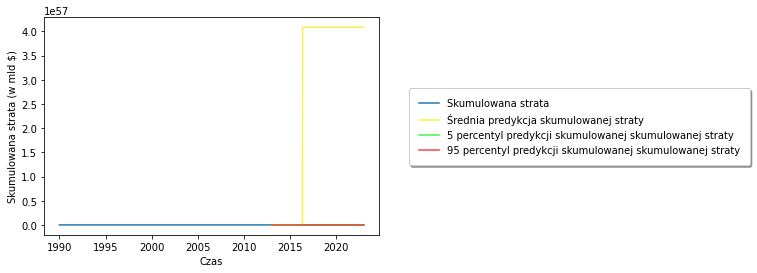

In [109]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_sin_burr_bootknife_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_sin_burr_bootknife_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_sin_burr_bootknife_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootknife\\cum_loss_burr_sin_bootknife_avg.pdf",bbox_inches='tight')
plt.show()

Funkcja intensywności Power Law

In [95]:
cum_losses = []
MSE_array = []
MAE_array = []

for i in tqdm(range(number_of_simulations)):
    N_loss = nhpp(power_law_int_fun,power_law_params,len(np.floor(T_test['t']).unique()))
    damages_loss = np.array([stats.burr12.rvs(c=burr_c_bootknife_avg,d=burr_k_bootknife_avg,size=1) for i in range(len(N_loss[1]))]).flatten()
    damages_loss_cum = loss_pred(t_test,N_loss[1],damages_loss, T_test['t'])['damages']
    cum_losses.append(damages_loss_cum)
    MSE_array.append(MSE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    MAE_array.append(MAE(cum_loss_test["damages"].tail(1),(damages_loss_cum.tail(1)+float(cum_loss_train.tail(1)['damages']))))
    
cum_losses_power_law_burr_bootknife_avg = pd.DataFrame({"damages":np.mean(cum_losses,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_burr_bootknife_5p = pd.DataFrame({"damages":np.percentile(cum_losses,5,axis=0)},index=cum_loss_test.index)
cum_losses_power_law_burr_bootknife_95p = pd.DataFrame({"damages":np.percentile(cum_losses,95,axis=0)},index=cum_loss_test.index)

MSE_power_law_burr_bootknife = np.sum(MSE_array)/number_of_simulations
MAE_power_law_burr_bootknife = np.sum(MAE_array)/number_of_simulations

100%|██████████| 500/500 [27:42<00:00,  3.32s/it]


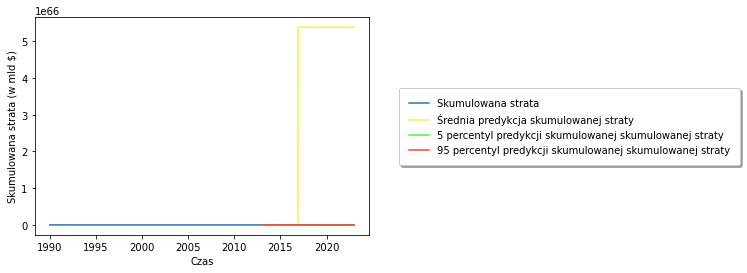

In [110]:
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_power_law_burr_bootknife_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f5f242")
plt.plot((cum_losses_power_law_burr_bootknife_5p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#42f545")
plt.plot((cum_losses_power_law_burr_bootknife_95p+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f54242")


plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Średnia predykcja skumulowanej straty','5 percentyl predykcji skumulowanej skumulowanej straty','95 percentyl predykcji skumulowanej skumulowanej straty'],loc='right', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=[1.77,0.5])

plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootknife\\cum_loss_burr_power_law_bootknife_avg.pdf",bbox_inches='tight')
plt.show()

### Wyniki

In [97]:
# Wyniki

print(pd.DataFrame
({
    'rozkład':['Wykładniczy','Wykładniczy', "Lognormalny", "Lognormalny", "Gamma", "Gamma", "Weibulla", "Weibulla", "Burra", "Burra"],
    'funkcja':['Sinusoidalna','Power Law','Sinusoidalna','Power Law','Sinusoidalna','Power Law','Sinusoidalna','Power Law','Sinusoidalna','Power Law'],
    'MSE':["{:e}".format(MSE_sin_exp_bootknife),"{:e}".format(MSE_power_law_exp_bootknife),"{:e}".format(MSE_sin_ln_bootknife),"{:e}".format(MSE_power_law_ln_bootknife),"{:e}".format(MSE_sin_gamma_bootknife),"{:e}".format(MSE_power_law_gamma_bootknife),"{:e}".format(MSE_sin_weibull_bootknife),"{:e}".format(MSE_power_law_weibull_bootknife),"{:e}".format(MSE_sin_burr_bootknife),"{:e}".format(MSE_power_law_burr_bootknife)],
    'MAE':["{:e}".format(MAE_sin_exp_bootknife),"{:e}".format(MAE_power_law_exp_bootknife),"{:e}".format(MAE_sin_ln_bootknife),"{:e}".format(MAE_power_law_ln_bootknife),"{:e}".format(MAE_sin_gamma_bootknife),"{:e}".format(MAE_power_law_gamma_bootknife),"{:e}".format(MAE_sin_weibull_bootknife),"{:e}".format(MAE_power_law_weibull_bootknife),"{:e}".format(MAE_sin_burr_bootknife),"{:e}".format(MAE_power_law_burr_bootknife)]                                            
}))

       rozkład       funkcja            MSE           MAE
0  Wykładniczy  Sinusoidalna   7.254128e+16  2.689443e+08
1  Wykładniczy     Power Law   3.762497e+16  1.936857e+08
2  Lognormalny  Sinusoidalna   7.272106e+16  2.694612e+08
3  Lognormalny     Power Law   3.785748e+16  1.943972e+08
4        Gamma  Sinusoidalna   7.250584e+16  2.690531e+08
5        Gamma     Power Law   3.755301e+16  1.936271e+08
6     Weibulla  Sinusoidalna   7.213493e+16  2.683715e+08
7     Weibulla     Power Law   3.745971e+16  1.933843e+08
8        Burra  Sinusoidalna  8.339968e+129  4.085466e+63
9        Burra     Power Law  1.447236e+148  5.380030e+72


In [100]:
print(pd.DataFrame
({
    'rozkład':['Wykładniczy','Wykładniczy', "Lognormalny", "Lognormalny", "Gamma", "Gamma", "Weibulla", "Weibulla", "Burra", "Burra"],
    'funkcja':['Sinusoidalna','Power Law','Sinusoidalna','Power Law','Sinusoidalna','Power Law','Sinusoidalna','Power Law','Sinusoidalna','Power Law'],
    'MSE':[MSE_sin_exp_bootknife,MSE_power_law_exp_bootknife,MSE_sin_ln_bootknife,MSE_power_law_ln_bootknife,MSE_sin_gamma_bootknife,MSE_power_law_gamma_bootknife,MSE_sin_weibull_bootknife,MSE_power_law_weibull_bootknife,MSE_sin_burr_bootknife,MSE_power_law_burr_bootknife],
    'MAE':[MAE_sin_exp_bootknife,MAE_power_law_exp_bootknife,MAE_sin_ln_bootknife,MAE_power_law_ln_bootknife,MAE_sin_gamma_bootknife,MAE_power_law_gamma_bootknife,MAE_sin_weibull_bootknife,MAE_power_law_weibull_bootknife,MAE_sin_burr_bootknife,MAE_power_law_burr_bootknife]                                            
}))

       rozkład       funkcja            MSE           MAE
0  Wykładniczy  Sinusoidalna   7.254128e+16  2.689443e+08
1  Wykładniczy     Power Law   3.762497e+16  1.936857e+08
2  Lognormalny  Sinusoidalna   7.272106e+16  2.694612e+08
3  Lognormalny     Power Law   3.785748e+16  1.943972e+08
4        Gamma  Sinusoidalna   7.250584e+16  2.690531e+08
5        Gamma     Power Law   3.755301e+16  1.936271e+08
6     Weibulla  Sinusoidalna   7.213493e+16  2.683715e+08
7     Weibulla     Power Law   3.745971e+16  1.933843e+08
8        Burra  Sinusoidalna  8.339968e+129  4.085466e+63
9        Burra     Power Law  1.447236e+148  5.380030e+72


Rozkład parametrów otrzymanych poprzez dopasowywanie do danych syntentycznych.

exp_lambda_bootknife


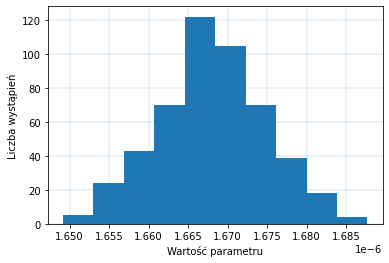

ln_mu_bootknife


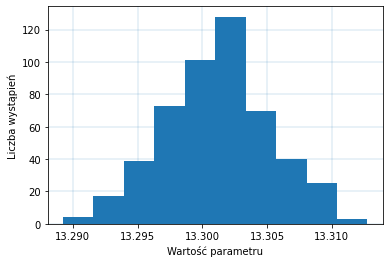

ln_sigma_sq_bootknife


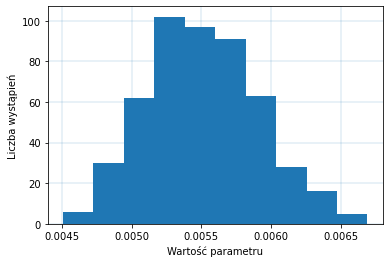

gamma_alfa_bootknife


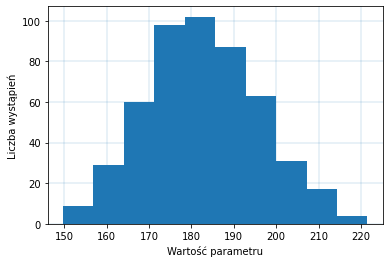

gamma_beta_bootknife


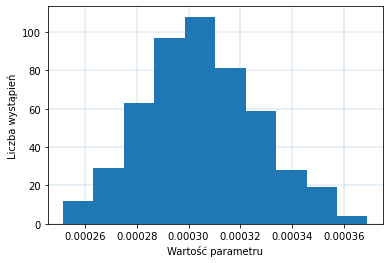

weibull_k_bootknife


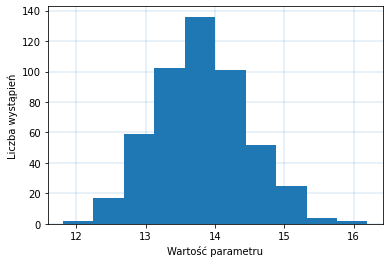

weibull_lambda_bootknife


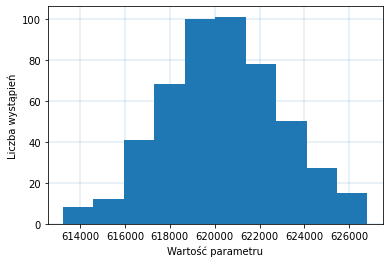

burr_c_bootknife


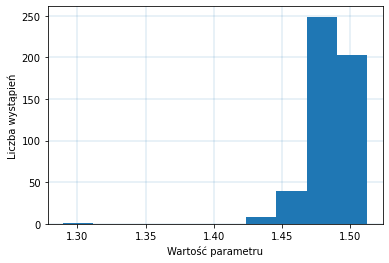

burr_k_bootknife


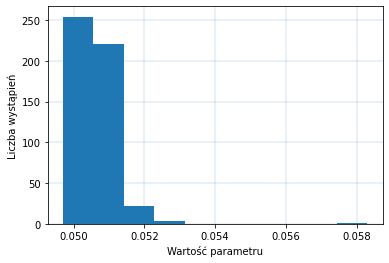

In [99]:
names = ["exp_lambda_bootknife" ,"ln_mu_bootknife" ,"ln_sigma_sq_bootknife" ,"gamma_alfa_bootknife" ,"gamma_beta_bootknife" ,"weibull_k_bootknife" ,"weibull_lambda_bootknife" ,"burr_c_bootknife" ,"burr_k_bootknife"]
j = 0

for i in [exp_lambda_bootknife ,
ln_mu_bootknife ,
ln_sigma_sq_bootknife ,
gamma_alfa_bootknife ,
gamma_beta_bootknife ,
weibull_k_bootknife ,
weibull_lambda_bootknife ,
burr_c_bootknife ,
burr_k_bootknife]:
    plt.hist(i)
    plt.xlabel("Wartość parametru")
    plt.ylabel("Liczba wystąpień")
    plt.grid(color='C0', linestyle='-', linewidth=0.2)
    plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje Bootknife\\"+names[j]+"_distribution.pdf",bbox_inches='tight')
    print(names[j])
    j += 1
    plt.show()

# STARE PODEJŚCIE

In [ ]:
def bootstrap(data,S , B = 100):
    """
    Argumenty:
        data: pd.Series
            Ciąg start
        B: float
            Liczba próbek bootstrapowych
        S: fun
            Statystka
    Zwraca:
        
            
    """
    X= []
    for i in range(B):
        X.append(S(pd.Series(data).sample(len(data),replace=True)))
    std = np.sqrt(np.sum(np.square(X-np.mean(X)))/(B-1))
    print("S: ",round(S(X),2),"std(S): ", round(std,2), "CI: ",[S(X)-stats.t.ppf(1-2.5/100,len(X)-1)*std/np.sqrt(len(X)),S(X)-stats.t.ppf(2.5/100,len(X)-1)*std/np.sqrt(len(X))])
    return(S(X),std,[S(X)-stats.t.ppf(1-2.5/100,len(X)-1)*std/np.sqrt(len(X)),S(X)-stats.t.ppf(2.5/100,len(X)-1)*std/np.sqrt(len(X))])

In [ ]:
def bootstrap(data,S ,alpha, B = 100):
    """
    Argumenty:
        data: pd.Series
            Ciąg start
        S: fun
            Statystka
        alpha: float
            Poziom istotności    
        B: float
            Liczba próbek bootstrapowych
    Zwraca:
        
            
    """
    X= []
    for i in range(B):
        X.append(S(pd.Series(data).sample(len(data),replace=True)))
    std = np.sqrt(np.sum(np.square(X-np.mean(X)))/(B-1))
    print("S: ",round(S(X),2),"std(S): ", round(std,2), "CI: ",[round(np.percentile(X,alpha/2),2),round(np.percentile(X,100-alpha/2),2)])
    return(S(X),std,[np.percentile(X,alpha/2),np.percentile(X,100-alpha/2)],X)

In [ ]:
b = bootstrap(train['Insured Damages, Adjusted (\'000 US$)'],np.mean,5,100)

S:  604433.11 std(S):  41769.42 CI:  [526997.07, 671604.86]


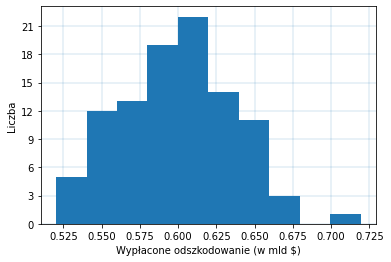

In [ ]:
plt.hist(np.array(b[3])/1e6)
plt.xlabel("Wypłacone odszkodowanie (w mld $)")
plt.ylabel("Liczba")
plt.grid(color='C0', linestyle='-', linewidth=0.2)
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_xlim(left=0)
#ax.set_yticks(np.linspace(1,11,num=11))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje\\bootstrap_hist.pdf")
plt.show()

In [ ]:
stats.bootstrap((train['Insured Damages, Adjusted (\'000 US$)'],),np.mean,confidence_level=0.95)

BootstrapResult(confidence_interval=ConfidenceInterval(low=521450.3072545228, high=694631.5955569998), standard_error=44283.81255742042)

In [ ]:
cum_losses_sin_exp_avg

,damages
t,
2013.000000,0.000000e+00
2013.002740,2.539095e+04
2013.005479,6.246515e+04
2013.008219,9.904594e+04
2013.010959,1.297125e+05
...,...
2022.986301,2.180131e+08
2022.989041,2.180313e+08
2022.991781,2.180503e+08


In [ ]:
loss_test_bootstrap = pd.merge(T_test, pd.DataFrame({'t':test['t'], "Mean":b[0], "LB": b[2][0], "UB": b[2][1]}), on='t', how='left').fillna(0).groupby('t').sum()
cum_loss_test_bootstrap = loss_test_bootstrap.cumsum()

In [ ]:
bootstrap = pd.DataFrame({"Mean":b[0], "LB": b[2][0], "UB": b[2][1]},index=loss_test.index)
cum_bootstrap = bootstrap.cumsum()

In [ ]:
cum_loss_test_bootstrap

,Mean,LB,UB
t,,,
2013.000000,0.000000e+00,0.000000e+00,0.000000e+00
2013.002740,0.000000e+00,0.000000e+00,0.000000e+00
2013.005479,0.000000e+00,0.000000e+00,0.000000e+00
2013.008219,0.000000e+00,0.000000e+00,0.000000e+00
2013.010959,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...
2022.986301,8.255627e+07,7.186365e+07,9.415050e+07
2022.989041,8.255627e+07,7.186365e+07,9.415050e+07
2022.991781,8.255627e+07,7.186365e+07,9.415050e+07


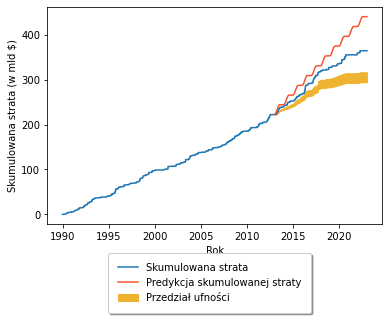

In [ ]:
#Sinusoidalna funkcja intensywności
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_sin_exp_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f85431")
plt.fill_between(cum_loss_test_bootstrap.index,(cum_loss_test_bootstrap["LB"]+float(cum_loss_train["damages"].tail(1)))/1e6,(cum_loss_test_bootstrap["UB"]+float(cum_loss_train["damages"].tail(1)))/1e6,color="#efb332")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty', 'Przedział ufności'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje\\cum_loss_exp_sin_bootstrap.pdf",bbox_inches='tight')
plt.show()

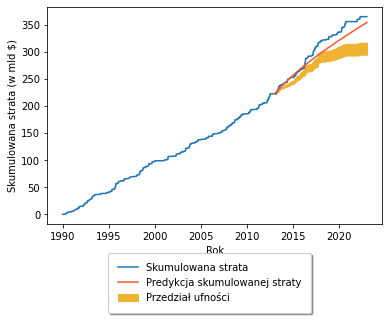

In [ ]:
#Sinusoidalna funkcja intensywności
plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_losses_power_law_exp_avg+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f85431")
plt.fill_between(cum_loss_test_bootstrap.index,(cum_loss_test_bootstrap["LB"]+float(cum_loss_train["damages"].tail(1)))/1e6,(cum_loss_test_bootstrap["UB"]+float(cum_loss_train["damages"].tail(1)))/1e6,color="#efb332")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty', 'Przedział ufności'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje\\cum_loss_exp_sin_bootstrap.pdf",bbox_inches='tight')
plt.show()

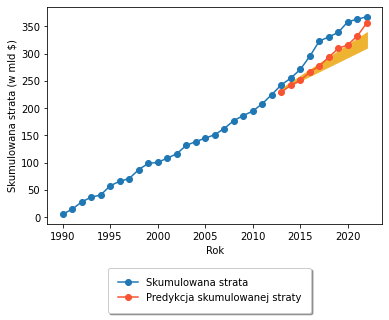

In [ ]:
#Sinusoidalna funkcja intensywności
plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_ln["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.fill_between(cum_loss_sin_ln.index,(cum_bootstrap["LB"]+cum_loss_full["Damages"][2012])/1e6,(cum_bootstrap["UB"]+cum_loss_full["Damages"][2012])/1e6,color="#efb332")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje\\cum_loss_ln_sin_bootstrap.pdf",bbox_inches='tight')
plt.show()

### Bootknife

In [ ]:
def bootknife(data,S ,alpha, B = 100):
    """
    Argumenty:
        data: pd.Series
            Ciąg start
        B: float
            Liczba próbek bootstrapowych
        S: fun
            Statystka
        alpha: float
            Poziom istotności
    Zwraca:
        
            
    """
    X= []
    for i in range(B):
        obs_to_delete = random.choice(pd.Series(data).index)
        data_r = data.drop(obs_to_delete)
        X.append(S(pd.Series(data_r).sample(len(data),replace=True)))
    std = np.sqrt(np.sum(np.square(X-np.mean(X)))/(B-1))
    print("S: ",round(S(X),2),"std(S): ", round(std,2), "CI: ",[round(np.percentile(X,alpha/2),2),round(np.percentile(X,100-alpha/2),2)])
    return(S(X),std,[np.percentile(X,alpha/2),np.percentile(X,100-alpha/2)],X)

In [ ]:
b2 = bootknife(loss_train['Damages'],np.mean,5,100)

S:  9867131.01 std(S):  973764.36 CI:  [8148087.64, 11847820.25]


In [ ]:
bootknife = pd.DataFrame({"n":pd.Series(test.groupby('Year').count()['Dis No']), "Mean":b[0], "LB": b[2][0], "UB": b[2][1]})
cum_bootknife = bootknife.cumsum()

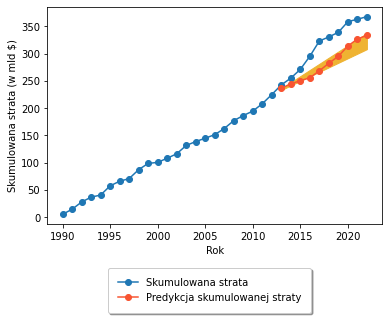

In [ ]:
#Sinusoidalna funkcja intensywności
plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_exp["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.fill_between(cum_loss_sin_exp.index,(cum_bootknife["LB"]+cum_loss_full["Damages"][2012])/1e6,(cum_bootknife["UB"]+cum_loss_full["Damages"][2012])/1e6,color="#efb332")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje\\cum_loss_exp_sin_bootknife.pdf",bbox_inches='tight')
plt.show()

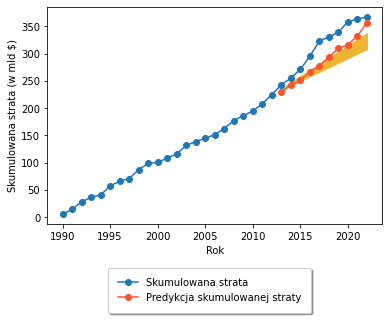

In [ ]:
#Sinusoidalna funkcja intensywności
plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_ln["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.fill_between(cum_loss_sin_ln.index,(cum_bootknife["LB"]+cum_loss_full["Damages"][2012])/1e6,(cum_bootknife["UB"]+cum_loss_full["Damages"][2012])/1e6,color="#efb332")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\Symulacje\\cum_loss_ln_sin_bootknife.pdf",bbox_inches='tight')
plt.show()